### Business Understanding
**Problem**

Campaign ini digunakan untuk membuat pengguna membuka deposito berjangka, namun jika tim pemasaran menjangkau setiap pengguna, hal ini akan menghabiskan banyak sumber daya. Oleh karena itu untuk meningkatkan efektivitasnya tim pemasaran ingin memfilter dan hanya menghubungi pengguna dengan persentase tinggi untuk membuka deposito berjangka.

**Goals**

Berdasarkan Rumusan Masalah tim pemasaran ingin memiliki kemampuan untuk memprediksi kemungkinan pengguna membuka deposito atau tidak, sehingga mereka dapat menargetkan kampanye ke salah satu yang diprediksi menjawab ya.


 **Judul** : Prediktive Klasifikasi Nasabah potensial untuk pembukaan rekening deposito melalui telemarketing

 **Mesin learning** : Supervised Learning

**Model**: Clasifikasi
 Algoritma :Logistic Regression, KNN, Decision Tree, Random Forest, XGBoost, LightGBM, Gradient


In [1]:
pip install ucimlrepo # Install Package to get Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
bank_marketing = fetch_ucirepo(id=222)

df = pd.concat([bank_marketing.data.features , bank_marketing.data.targets],axis = 1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


## Data Description
Data nasabah bank:
1. Age : Usia Nasabah (numerik)
2. Job : Jenis pekerjaan  (kategoris: 'admin.','kerah biru','wirausahawan','pembantu rumah tangga','manajemen','pensiun','wiraswasta','jasa','mahasiswa' ,'teknisi','pengangguran','tidak diketahui')
3. Marital : Status Perkawinan  (kategoris: 'bercerai', 'menikah', 'lajang', 'tidak diketahui'; catatan: 'bercerai' berarti bercerai atau janda)
4. Education :Tidak mengikuti pendidikan normal
5. Default : pernah gagal pembayaran kredit? (kategoris: 'tidak', 'ya', 'tidak diketahui')
6. Balance : Saldo nasabah
7. Housing : Memiliki pinjaman rumah (KPR) (kategoris: 'tidak', 'ya', 'tidak diketahui')
8. Loan :  punya pinjaman pribadi? (kategoris: 'tidak', 'ya', 'tidak diketahui')
9. Contact : Jenis Komunikasi kontak (kategoris: 'seluler','telepon')
10. Mounth : bulan kontak terakhir dalam setahun (kategoris: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day_of_week: hari kontak terakhir dalam seminggu (kategoris: 'sen','sel','wed','thu','fri')
12. Duration : durasi kontak terakhir, dalam hitungan detik (numerik). Catatan penting: atribut ini sangat mempengaruhi target keluaran (misalnya, jika durasi=0 maka y='tidak'). Namun, durasinya tidak diketahui sebelum panggilan dilakukan. Juga, setelah panggilan berakhir, y diketahui dengan jelas. Oleh karena itu, masukan ini hanya boleh dimasukkan untuk tujuan tolok ukur dan harus dibuang jika tujuannya adalah untuk mendapatkan model prediksi yang realistis.
13. Campaign : Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerik, termasuk kontak terakhir)
14. Pdays : jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (angka; 999 berarti klien belum pernah dihubungi sebelumnya)
15. Previous : jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerik)
16. poutcome: hasil kampanye pemasaran sebelumnya (kategoris: 'kegagalan', 'tidak ada', 'sukses')
17. y : apakah klien sudah berlangganan deposito berjangka? (biner: 'ya', 'tidak') ya = 1 tidak = 0



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
## Mengecek missing values
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

##Explaratory Data Analysis

**Statistic Descriptive**

In [ ]:
display(df.describe(), df.describe(include='object'))

: 


##Data Preparation

**Check Outlier**

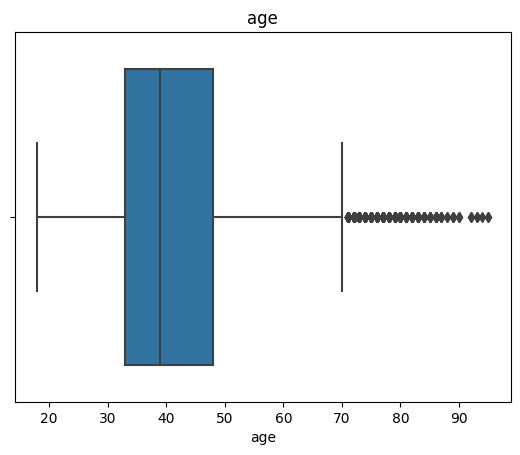

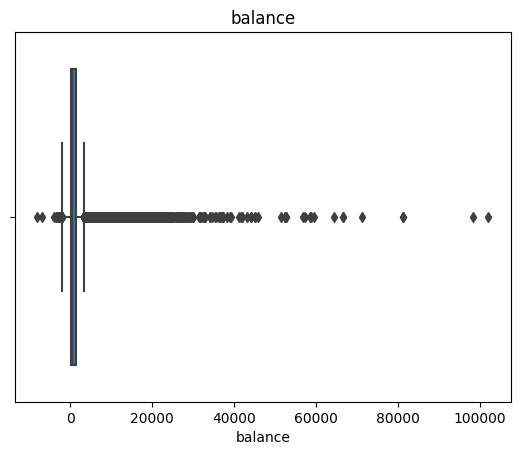

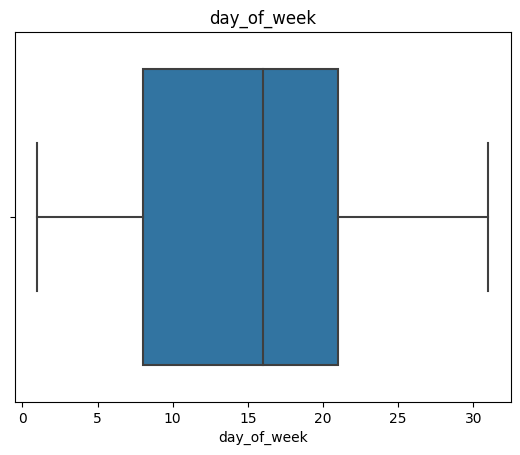

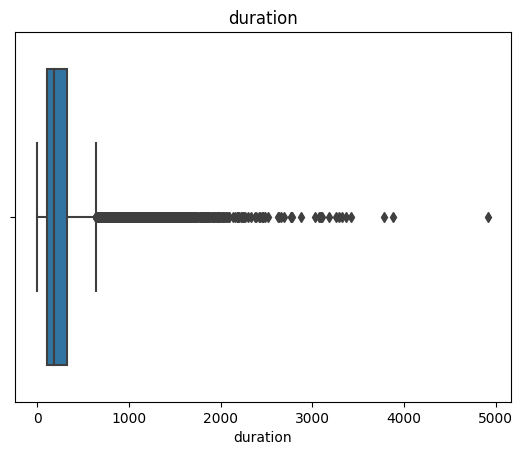

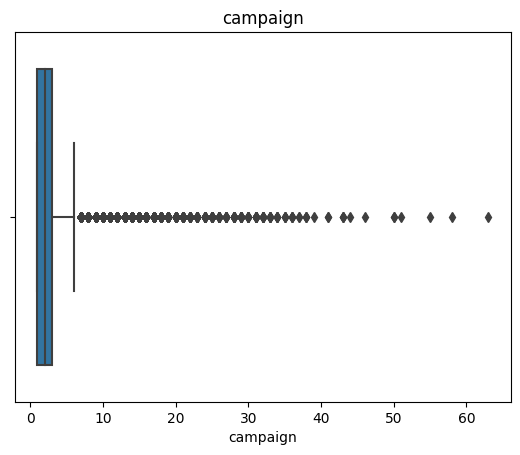

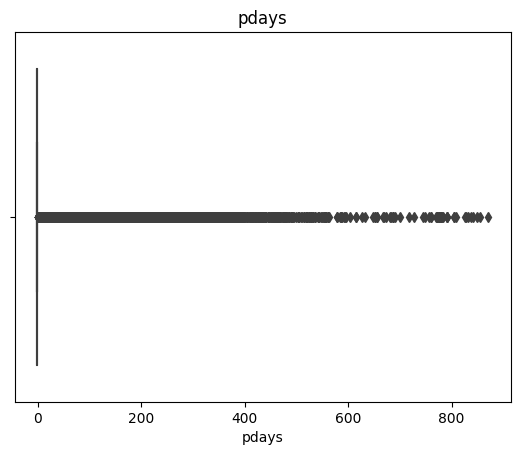

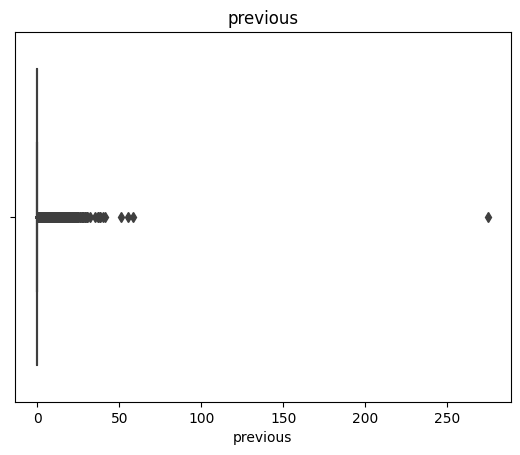

In [7]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# create boxplots for numerical columns
for col in num_cols:
    plt.figure()
    sns.boxplot(data=df, x=col)
    plt.title(col)

In [8]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

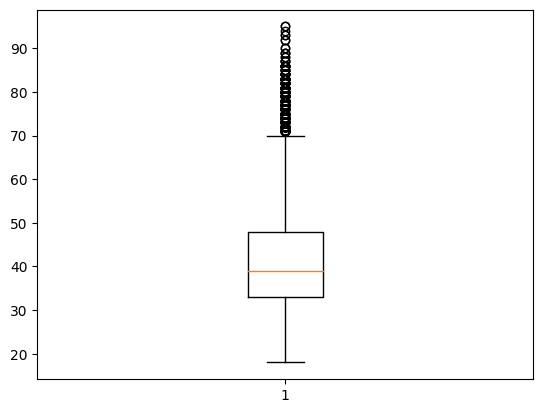

In [9]:
plt.boxplot(df['age'])
plt.show()

In [10]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Number of Outlier in Age Column : {len(outliers)}")

Number of Outlier in Age Column : 487


In [11]:
out_all=outliers.pivot_table(columns='age', index=['y'], aggfunc='size')
out_all['Total']=out_all.sum(axis =1)
out_all.sort_values('Total',ascending=False)

age,71,72,73,74,75,76,77,78,79,80,...,86,87,88,89,90,92,93,94,95,Total
y,,,,,,,,,,,,,,,,,,,,,
no,29.0,28.0,20.0,24.0,24.0,16.0,22.0,16.0,15.0,19.0,...,5.0,1.0,2.0,3.0,NaN,NaN,NaN,1.0,1.0,269.0
yes,25.0,24.0,24.0,13.0,15.0,16.0,22.0,14.0,10.0,12.0,...,4.0,3.0,NaN,NaN,2.0,2.0,2.0,NaN,1.0,218.0


In [12]:
df['y'] = df['y'].replace({'yes': 1, 'no': 0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,0


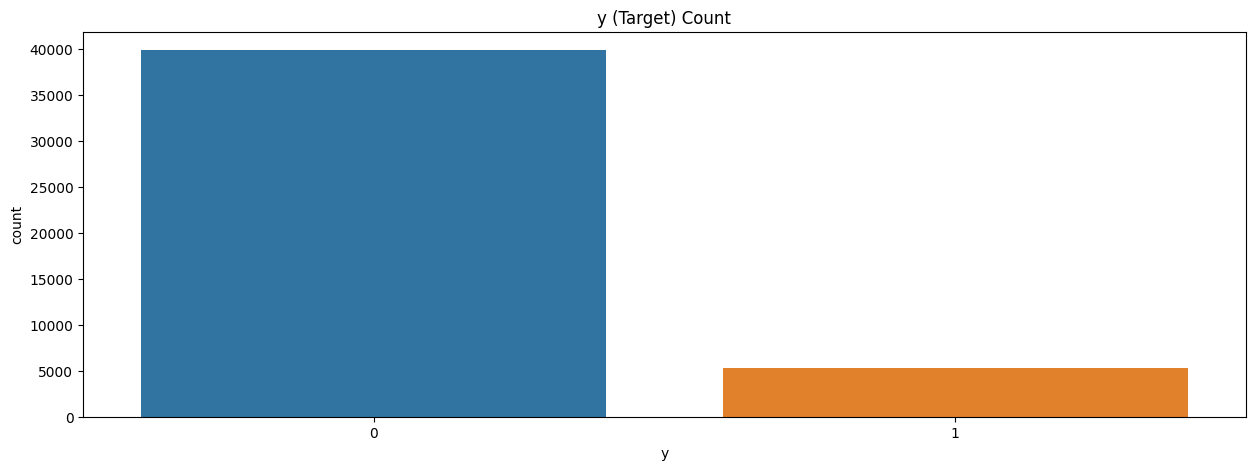

In [13]:
plt.figure(figsize=(15, 5))
sns.countplot(x='y', data=df)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('y (Target) Count')
plt.show()

**Numerical Columns**

Text(0.5, 1.0, 'Job Count')

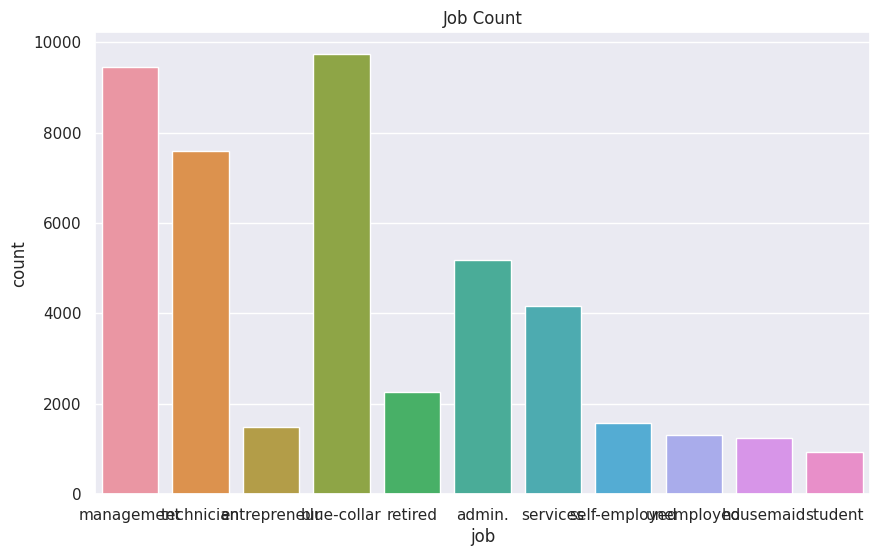

In [14]:
sns.countplot(data = df, x = 'job')
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Job Count')

Text(0.5, 1.0, 'Job Count Based on Target')

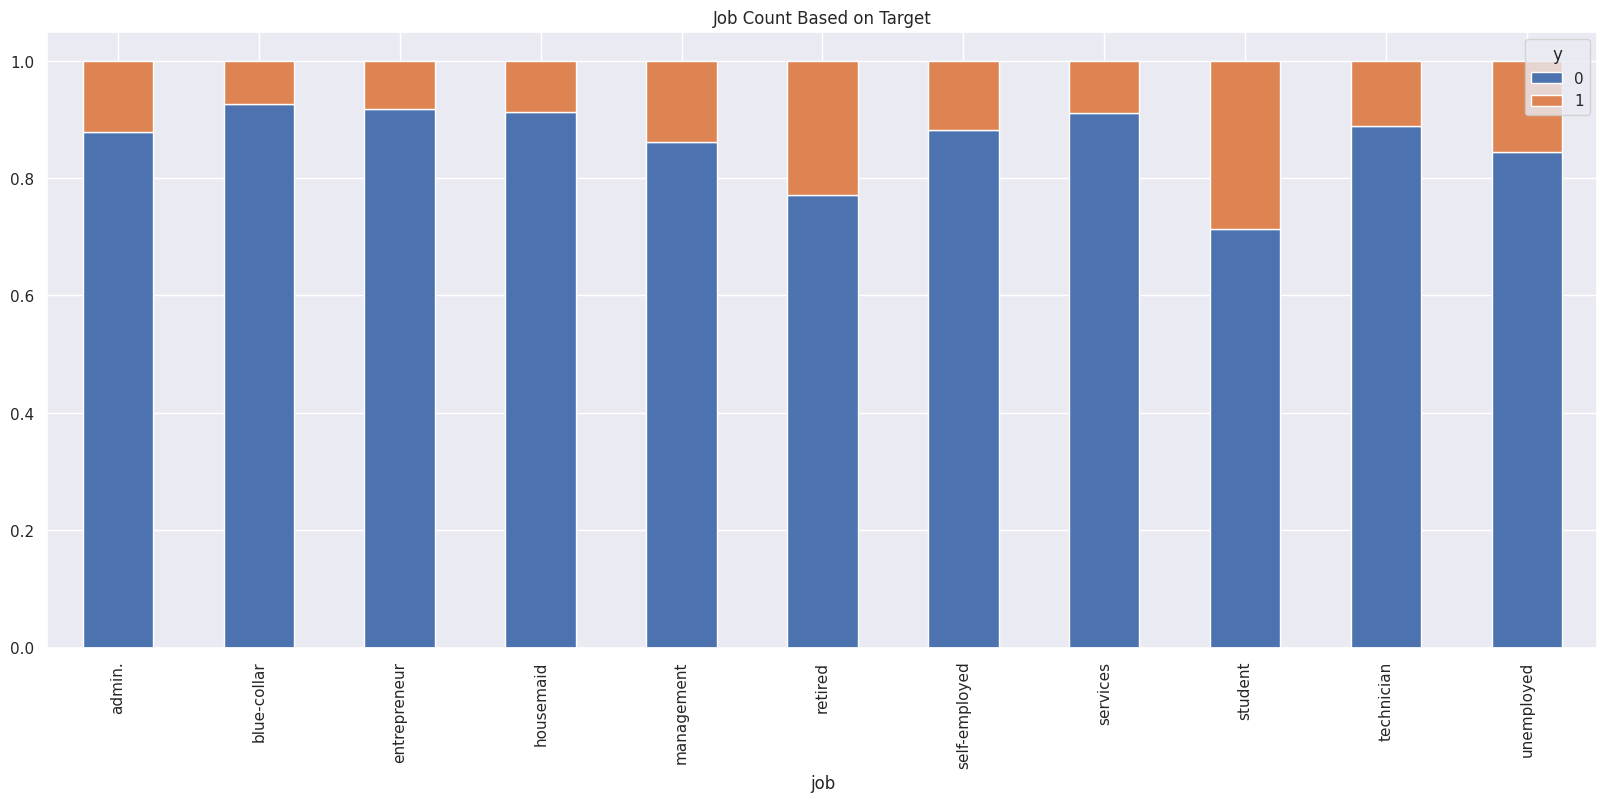

In [15]:
Job=pd.crosstab(df["job"],df['y'])
Job.div(Job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(20,8))
plt.title('Job Count Based on Target')

Text(0.5, 1.0, 'P Outcome Count')

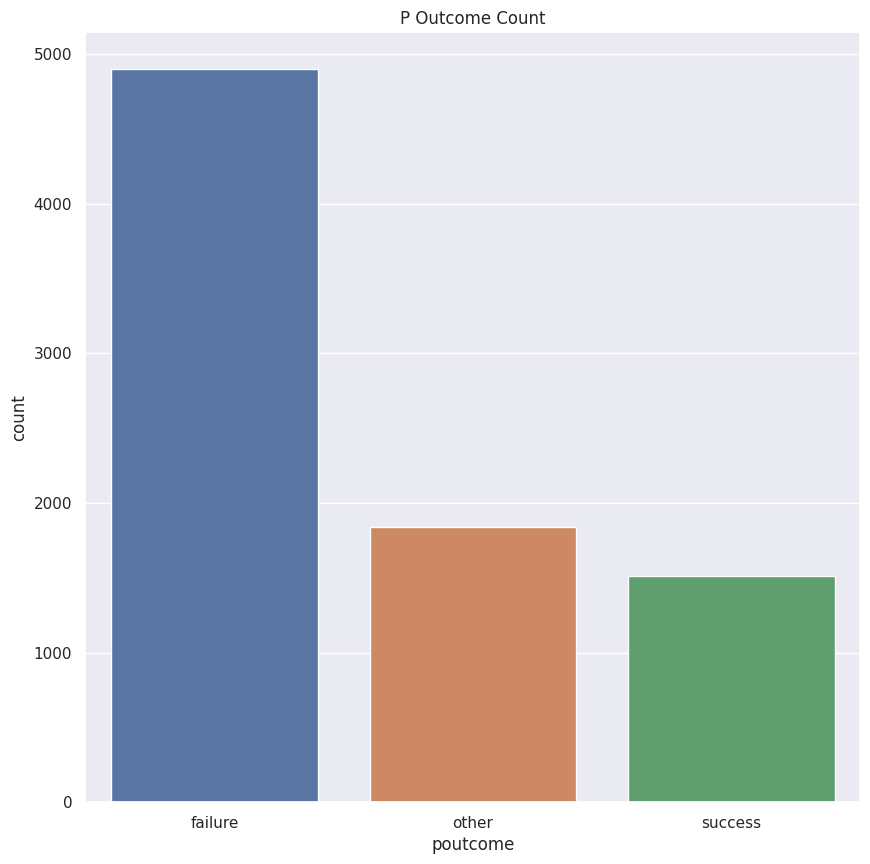

In [16]:
sns.countplot(data = df, x = 'poutcome')
sns.set(rc={'figure.figsize':(10,8)})
plt.title('P Outcome Count')

Text(0.5, 1.0, 'P Outcome Count Based on Target')

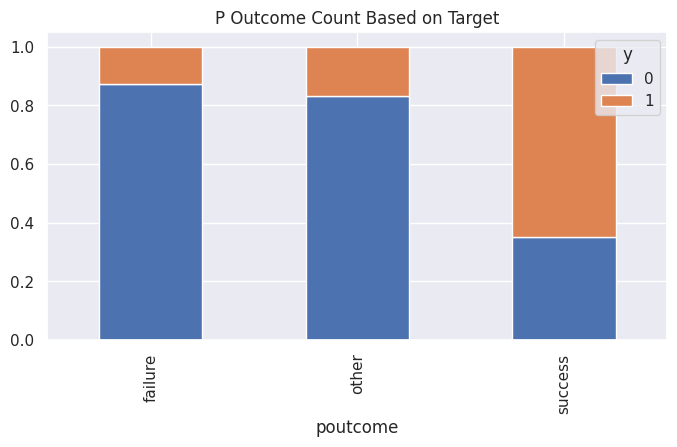

In [17]:
Poutcome=pd.crosstab(df["poutcome"],df['y'])
Poutcome.div(Poutcome.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,4))
sns.set(rc={'figure.figsize':(10,6)})
plt.title('P Outcome Count Based on Target')


**Contact**

Text(0.5, 1.0, 'Contact Count')

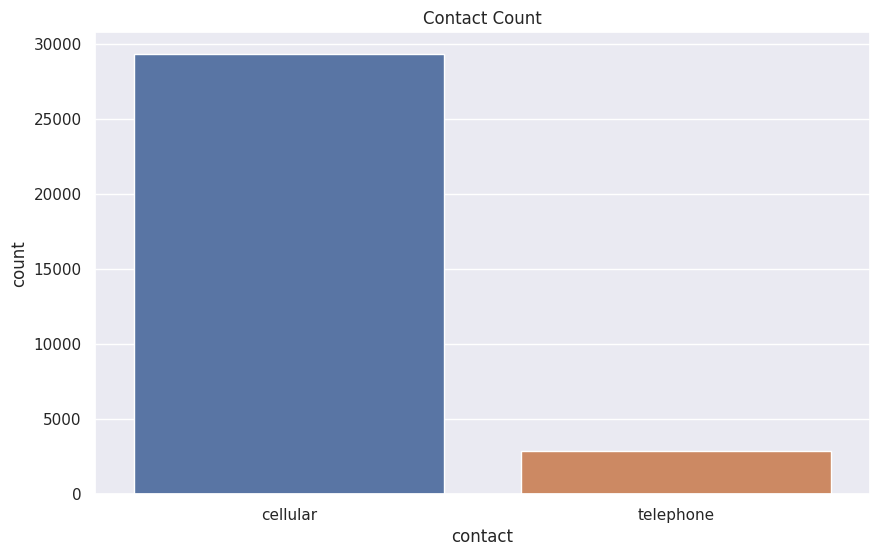

In [18]:
sns.countplot(data = df, x = 'contact')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Contact Count')

Text(0.5, 1.0, 'Contact Count Based on Target')

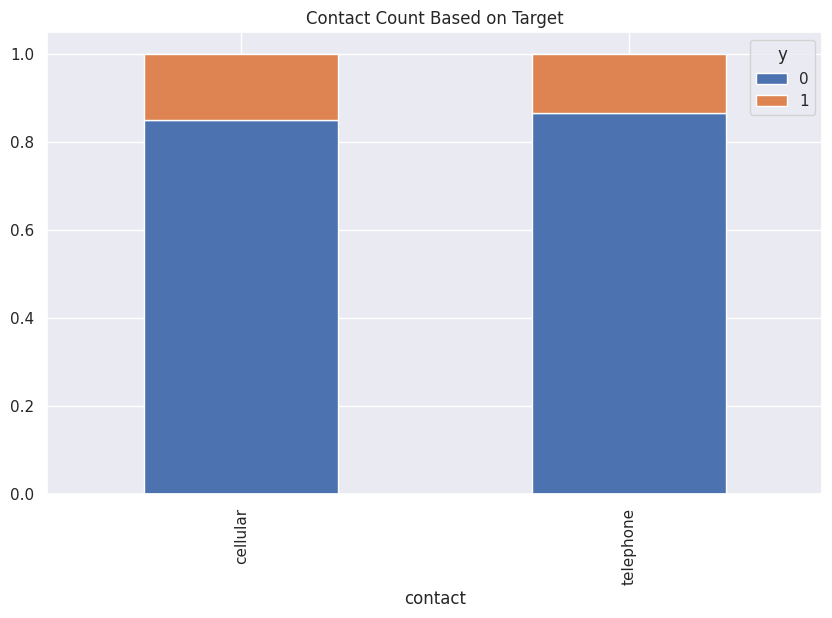

In [19]:
Contact=pd.crosstab(df["contact"],df['y'])
Contact.div(Contact.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Contact Count Based on Target')

**Mounth**

Text(0.5, 1.0, 'Month Count')

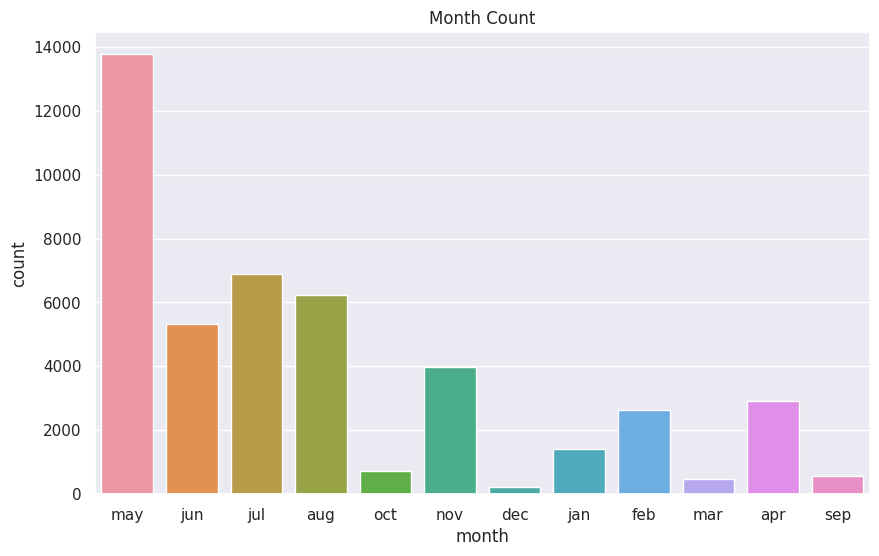

In [20]:
sns.countplot(data = df, x = 'month')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Month Count')

Text(0.5, 1.0, 'Month Count Based on Target')

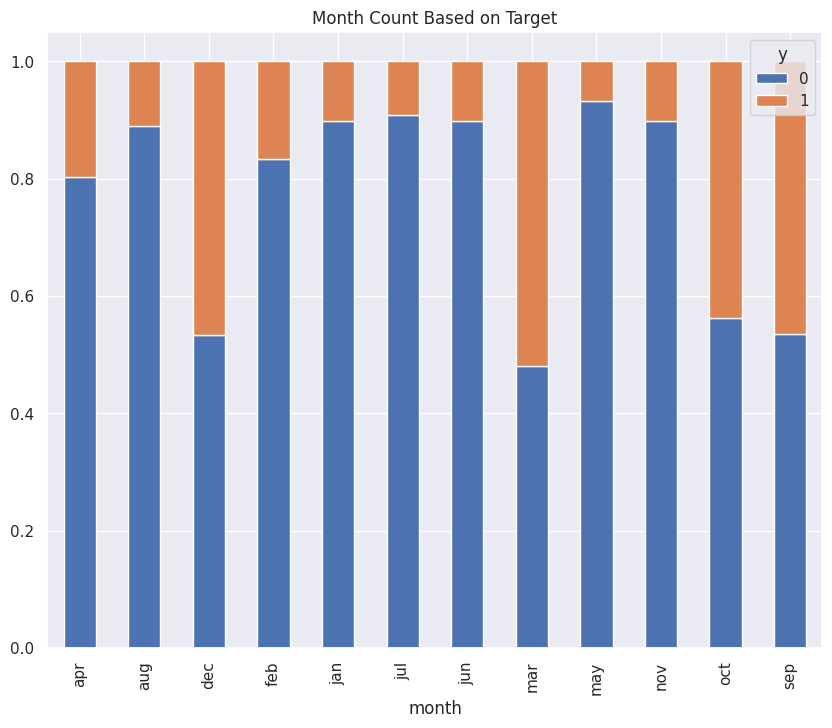

In [21]:
Month=pd.crosstab(df["month"],df['y'])
Month.div(Month.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,8))
plt.title('Month Count Based on Target')

**Loan (Pinjaman)**

Text(0.5, 1.0, 'Loan Count')

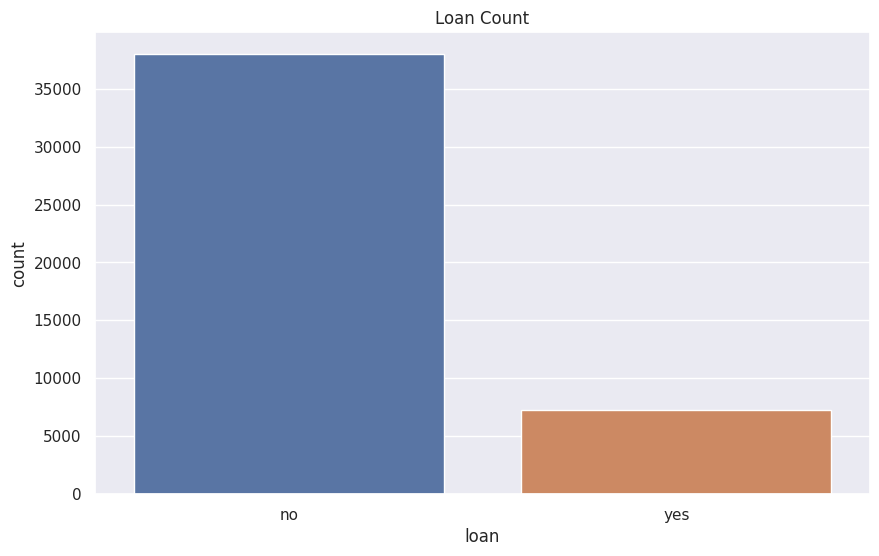

In [22]:
sns.countplot(data = df, x = 'loan')
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Loan Count')

Text(0.5, 1.0, 'Loan Count Based on Target')

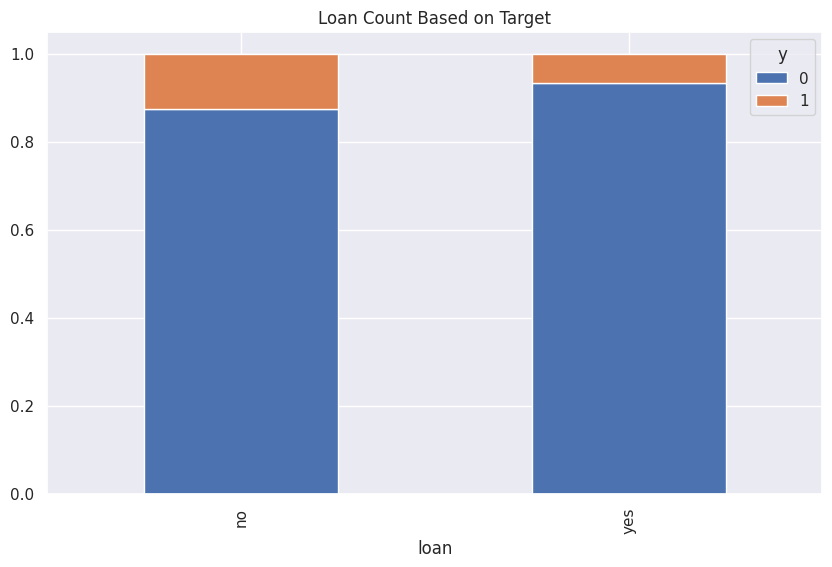

In [23]:
Loan=pd.crosstab(df["loan"],df['y'])
Loan.div(Loan.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Loan Count Based on Target')

**Default**

Text(0.5, 1.0, 'Default Count')

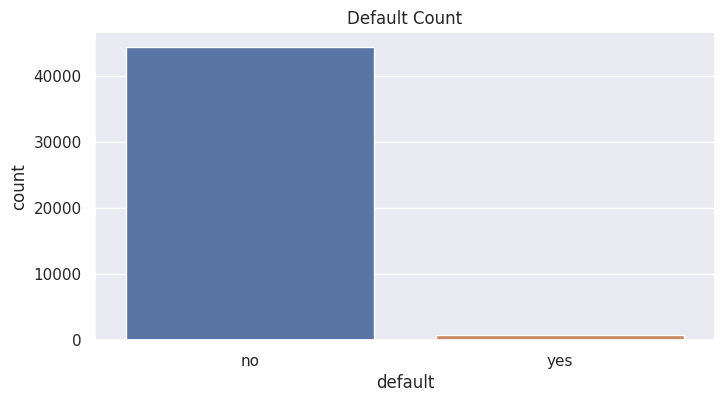

In [24]:
sns.countplot(data = df, x = 'default')
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Default Count')

Text(0.5, 1.0, 'Default Count Based on Target')

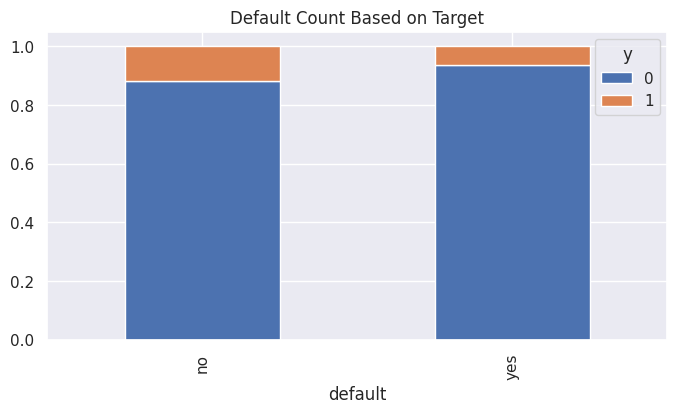

In [25]:
Default=pd.crosstab(df["default"],df['y'])
Default.div(Default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Default Count Based on Target')

**Education**

Text(0.5, 1.0, 'Education')

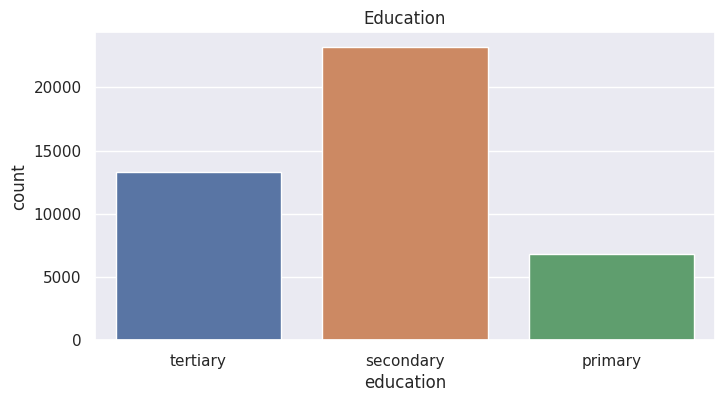

In [26]:
sns.countplot(data = df, x = 'education')
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Education')

Text(0.5, 1.0, 'Education Count Based on Target')

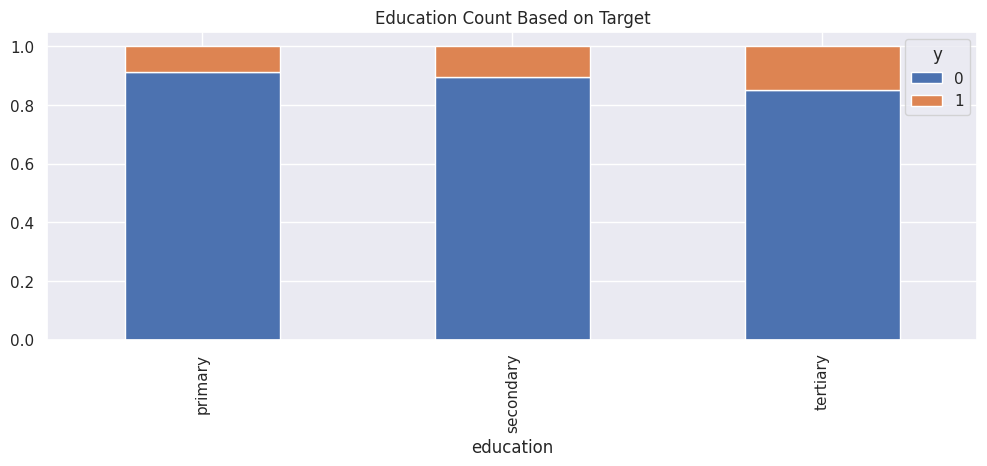

In [27]:
Default=pd.crosstab(df["education"],df['y'])
Default.div(Default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12,4))
plt.title('Education Count Based on Target')

**Previous**

Text(0.5, 1.0, 'Previous Count')

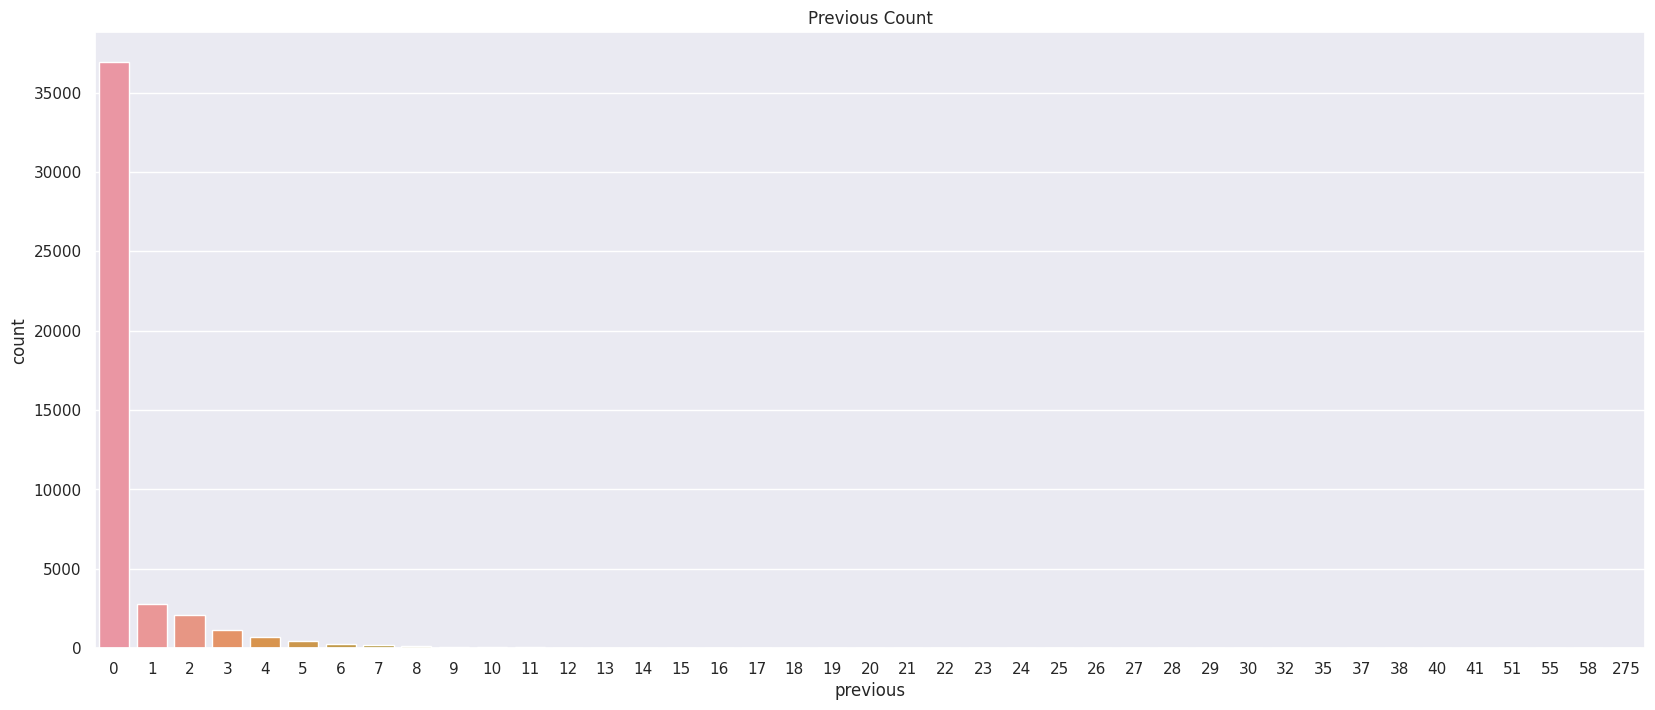

In [28]:
sns.countplot(data = df , x = 'previous')
sns.set(rc={'figure.figsize':(8,4)})
plt.title('Previous Count')

Text(0.5, 1.0, 'Previous Count based on Target')

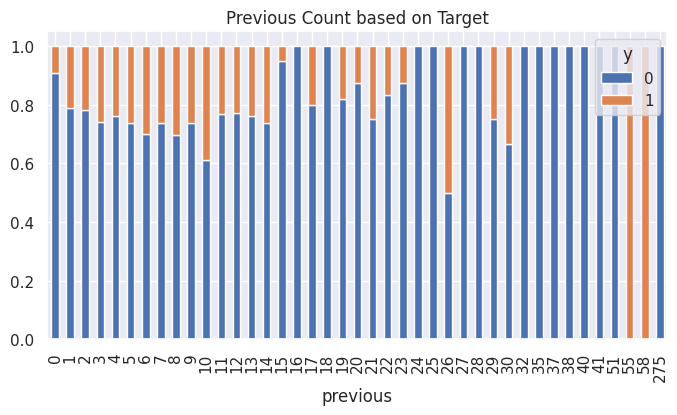

In [29]:
Previous=pd.crosstab(df["previous"],df['y'])
Previous.div(Previous.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
sns.set(rc={'figure.figsize':(10,6)})
plt.title('Previous Count based on Target')

**Duration**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


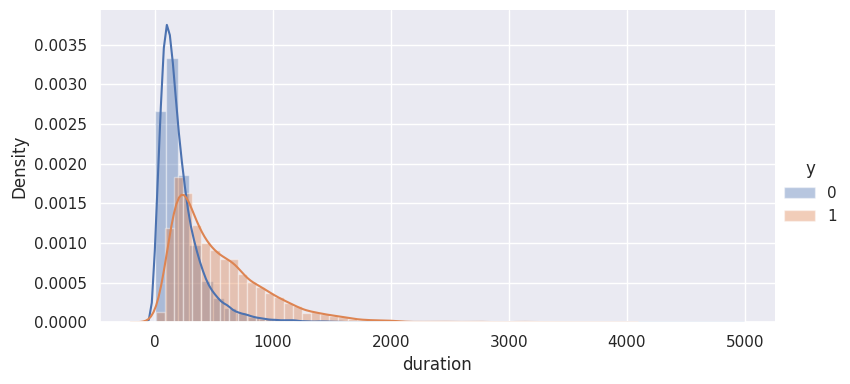

In [30]:
sns.FacetGrid(df, hue='y',height=4,aspect=2).map(sns.distplot, 'duration').add_legend()

**Day**

Text(0.5, 1.0, 'Day')

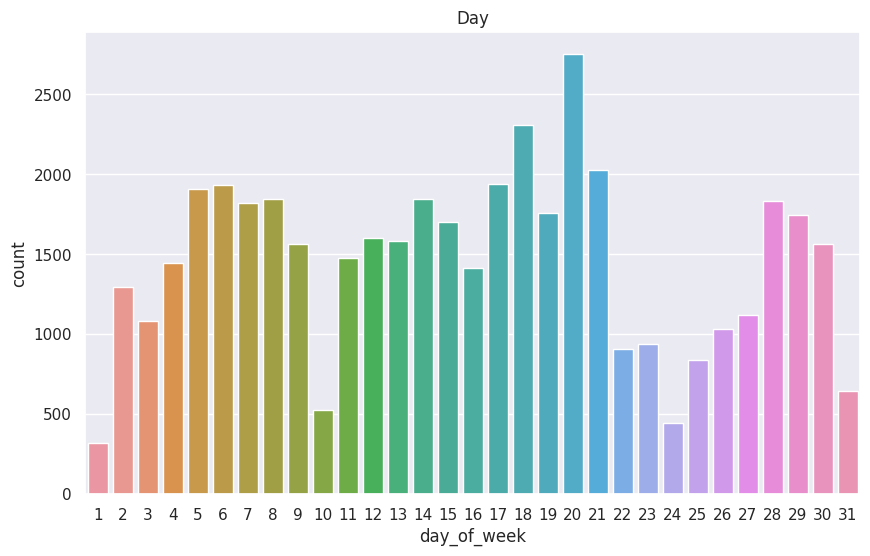

In [31]:
sns.countplot(data = df, x = 'day_of_week')
sns.set(rc={'figure.figsize':(20,8)})
plt.title('Day')

Text(0.5, 1.0, 'Day Count Based on Target')

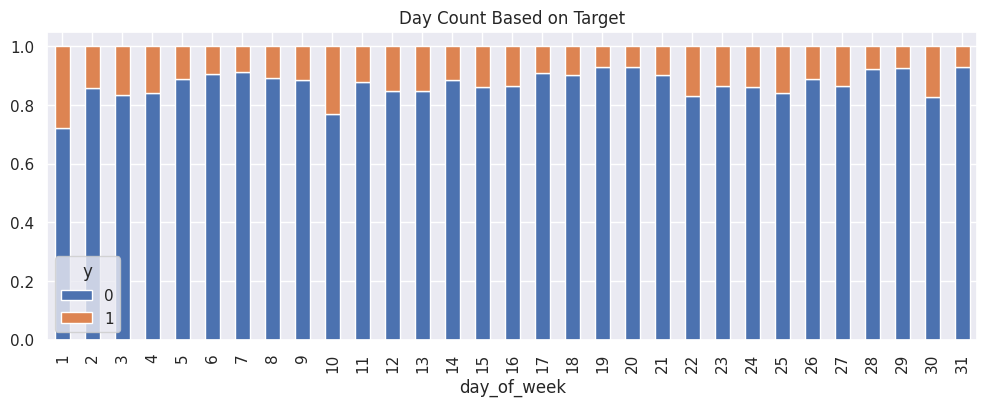

In [32]:
Default=pd.crosstab(df["day_of_week"],df['y'])
Default.div(Default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12,4))
plt.title('Day Count Based on Target')

### Handling Missing Values

In [33]:
df.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

In [34]:
for i in df:
  print(i,df[i].isnull().sum() / len(df) * 100)

age 0.0
job 0.6370131162770122
marital 0.0
education 4.1074074893278185
default 0.0
balance 0.0
housing 0.0
loan 0.0
contact 28.798301298356595
day_of_week 0.0
month 0.0
duration 0.0
campaign 0.0
pdays 0.0
previous 0.0
poutcome 81.74780473778506
y 0.0


In [35]:
# DROP Kolom Contact dan Poutcome karena jumlah null/Nan terlalu signifikan

df_clean = df.drop(columns=['contact','pdays','previous','poutcome','duration'])
df_clean

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,0
1,44,technician,single,secondary,no,29,yes,no,5,may,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,0
3,47,blue-collar,married,NaN,no,1506,yes,no,5,may,1,0
4,33,NaN,single,NaN,no,1,no,no,5,may,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,3,1
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,2,1
45208,72,retired,married,secondary,no,5715,no,no,17,nov,5,1
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,4,0


In [36]:
for i in df_clean:
  print(i,df[i].isnull().sum() / len(df) * 100)

age 0.0
job 0.6370131162770122
marital 0.0
education 4.1074074893278185
default 0.0
balance 0.0
housing 0.0
loan 0.0
day_of_week 0.0
month 0.0
campaign 0.0
y 0.0


In [37]:
df_clean.dropna(inplace = True)

In [38]:
df_clean.shape

(43193, 12)

In [39]:
df_clean.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
day_of_week    0
month          0
campaign       0
y              0
dtype: int64

Data prepation :
1.   Drop Kolom Contact dan Poutcome, dan hapus baris dengan missing Values
2.   Drop Kolom yang berkaitan dengan poutcome
3.   Hanya menggunakan 1 table

In [40]:
# Education
df_clean['education'] = df_clean['education'].replace({'primary':0,
                                           'secondary':1,
                                           'tertiary':2})

In [41]:
# Default
df_clean['default'] = df_clean['default'].replace({'no' : 0,
                                                   'yes' : 1})

In [42]:
# Housing
df_clean['housing'] = df_clean['housing'].replace({'no' : 0,
                                                   'yes' : 1})

In [43]:
# Loan
df_clean['loan'] = df_clean['loan'].replace({'no' : 0,
                                                   'yes' : 1})

**One hot encoding**

In [44]:
df_clean

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,campaign,y
0,58,management,married,2,0,2143,1,0,5,may,1,0
1,44,technician,single,1,0,29,1,0,5,may,1,0
2,33,entrepreneur,married,1,0,2,1,1,5,may,1,0
5,35,management,married,2,0,231,1,0,5,may,1,0
6,28,management,single,2,0,447,1,1,5,may,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,2,0,825,0,0,17,nov,3,1
45207,71,retired,divorced,0,0,1729,0,0,17,nov,2,1
45208,72,retired,married,1,0,5715,0,0,17,nov,5,1
45209,57,blue-collar,married,1,0,668,0,0,17,nov,4,0


In [45]:
df_clean = pd.get_dummies(df_clean)
df_clean

,age,education,default,balance,housing,loan,day_of_week,campaign,y,job_admin.,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,2,0,2143,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,1,0,29,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,1,0,2,1,1,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5,35,2,0,231,1,0,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,28,2,0,447,1,1,5,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2,0,825,0,0,17,3,1,0,...,0,0,0,0,0,0,0,1,0,0
45207,71,0,0,1729,0,0,17,2,1,0,...,0,0,0,0,0,0,0,1,0,0
45208,72,1,0,5715,0,0,17,5,1,0,...,0,0,0,0,0,0,0,1,0,0
45209,57,1,0,668,0,0,17,4,0,0,...,0,0,0,0,0,0,0,1,0,0


##Pemodelan

Text(0.5, 1.0, 'y')

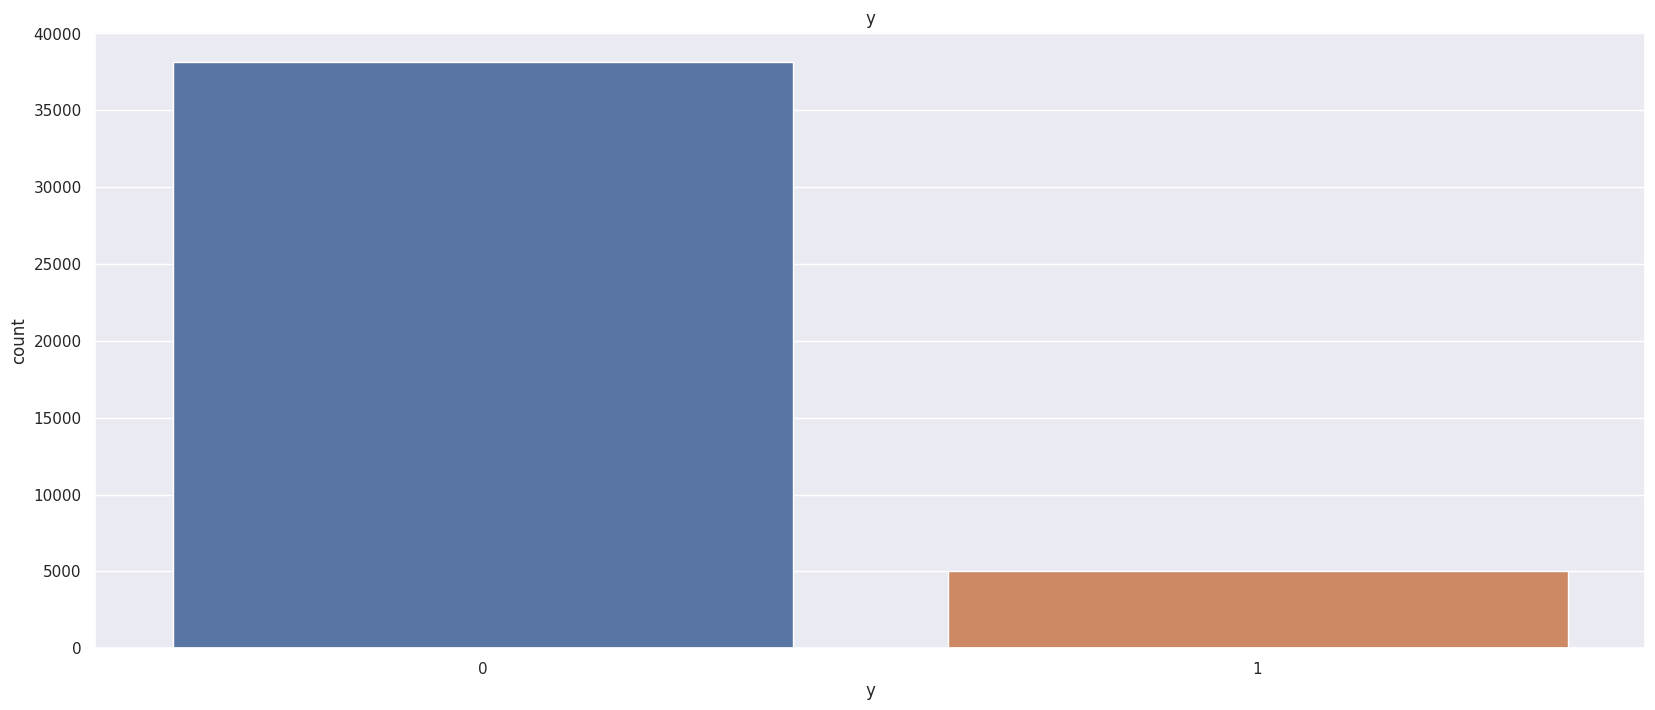

In [46]:
sns.countplot(data = df_clean, x = 'y')
sns.set(rc={'figure.figsize':(20,8)})
plt.title('y')

Dataset sangat unbalance

## Unbalance Data set

In [47]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43193 entries, 0 to 45210
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                43193 non-null  int64
 1   education          43193 non-null  int64
 2   default            43193 non-null  int64
 3   balance            43193 non-null  int64
 4   housing            43193 non-null  int64
 5   loan               43193 non-null  int64
 6   day_of_week        43193 non-null  int64
 7   campaign           43193 non-null  int64
 8   y                  43193 non-null  int64
 9   job_admin.         43193 non-null  uint8
 10  job_blue-collar    43193 non-null  uint8
 11  job_entrepreneur   43193 non-null  uint8
 12  job_housemaid      43193 non-null  uint8
 13  job_management     43193 non-null  uint8
 14  job_retired        43193 non-null  uint8
 15  job_self-employed  43193 non-null  uint8
 16  job_services       43193 non-null  uint8
 17  job_student 

In [48]:
#Split Training and Testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [49]:
#Input Variabel
x=df_clean.drop(columns=['y'])

#Target Variabel
y=df_clean['y']

In [50]:
#from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)


#from sklearn.preprocessing import StandardScaler

#x_train = scaler.fit_transform(x_train)

In [51]:
#Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

###Decision Tree Model

In [52]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [53]:
#Object Decision Tree
clf=DecisionTreeClassifier()
# Train Model
model_clf = clf.fit(x_train, y_train)
# predict model
y_pred_clf = model_clf.predict(x_test)

In [54]:
# Evaluasi Klasifikasi
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      7619
           1       0.26      0.28      0.27      1020

    accuracy                           0.82      8639
   macro avg       0.58      0.59      0.58      8639
weighted avg       0.83      0.82      0.82      8639



### Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [56]:
#Object Random forreast
rf=RandomForestClassifier()
# Train Model
model_rf = rf.fit(x_train, y_train)
# predict model
y_pred_rf = model_rf.predict(x_test)

In [57]:
# Evaluasi Klasifikasi
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7619
           1       0.57      0.16      0.25      1020

    accuracy                           0.89      8639
   macro avg       0.73      0.57      0.59      8639
weighted avg       0.86      0.89      0.86      8639



###XGBOOST Model

In [58]:
from xgboost import XGBClassifier

In [59]:
#Object XGBoost XGBClassifier
xgb=XGBClassifier()

#Training Model
model_xgb=xgb.fit(x_train, y_train)

#Predict Model
y_pred_xgb=model_xgb.predict(x_test)

In [60]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7619
           1       0.58      0.21      0.31      1020

    accuracy                           0.89      8639
   macro avg       0.74      0.60      0.63      8639
weighted avg       0.86      0.89      0.87      8639



###SVM Model


In [61]:
# # Import SVM
# from sklearn.svm import SVC

In [62]:
# #Object SVM
# svm=SVC(kernel='linear', random_state=0)

# #Training Model
# model_svm=svm.fit(x_train, y_train)

# #Predict Model
# y_pred_svm=model_svm.predict(x_test)

In [63]:
# print(classification_report(y_test,y_pred_svm))

### Naive Bayes Model

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [65]:
# Inisialisasi model Gaussian Naive Bayes
nb = GaussianNB()

# Latih model
model_nb=nb.fit(x_train, y_train)

# Uji model
y_pred_nb= model_nb.predict(x_test)

In [66]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7619
           1       0.36      0.33      0.35      1020

    accuracy                           0.85      8639
   macro avg       0.64      0.63      0.63      8639
weighted avg       0.85      0.85      0.85      8639



### LightGBM Model

In [67]:
pip install lightgbm

In [68]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [69]:
lgbm= lgb.LGBMClassifier()
model_lgbm = lgbm.fit(x_train, y_train)
y_pred_lgbm = model_lgbm.predict(x_test)

[LightGBM] [Info] Number of positive: 4001, number of negative: 30553
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 462
[LightGBM] [Info] Number of data points in the train set: 34554, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.115790 -> initscore=-2.032919
[LightGBM] [Info] Start training from score -2.032919


In [70]:
print(classification_report(y_test,y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7619
           1       0.62      0.17      0.27      1020

    accuracy                           0.89      8639
   macro avg       0.76      0.58      0.61      8639
weighted avg       0.87      0.89      0.86      8639



### Logistic Regression Model

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
lr= LogisticRegression()
model_lr = lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)

In [73]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7619
           1       0.00      0.00      0.00      1020

    accuracy                           0.88      8639
   macro avg       0.44      0.50      0.47      8639
weighted avg       0.78      0.88      0.83      8639



## SMOTE Oversampling

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
#Input Variabel
x=df_clean.drop(columns=['y'])

#Target Variabel
y=df_clean['y']

In [76]:
sm = SMOTE(sampling_strategy=0.6)
X_smote, y_smote = sm.fit_resample(x, y)

In [77]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=123)

###Decision Tree Model

In [78]:
#Object Decision Tree
clf=DecisionTreeClassifier()
# Train Model
model_clf_smote = clf.fit(x_train_smote, y_train_smote)
# predict model
y_pred_clf_smote = model_clf_smote.predict(x_test_smote)

In [79]:
# Evaluasi Klasifikasi
print(classification_report(y_test_smote,y_pred_clf_smote))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      7618
           1       0.82      0.85      0.83      4597

    accuracy                           0.87     12215
   macro avg       0.86      0.87      0.86     12215
weighted avg       0.87      0.87      0.87     12215



### Random Forest Model

In [80]:
#Object Random forreast
rf=RandomForestClassifier()
# Train Model
model_rf_smote = rf.fit(x_train_smote, y_train_smote)
# predict model
y_pred_rf_smote = model_rf.predict(x_test_smote)

In [81]:
# Evaluasi Klasifikasi
print(classification_report(y_test_smote,y_pred_rf_smote))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81      7618
           1       0.97      0.22      0.36      4597

    accuracy                           0.70     12215
   macro avg       0.83      0.61      0.58     12215
weighted avg       0.79      0.70      0.64     12215



###XGBOOST Model

In [82]:
#Object XGBoost XGBClassifier
xgb=XGBClassifier()

#Training Model
model_xgb_smote=xgb.fit(x_train_smote, y_train_smote)

#Predict Model
y_pred_xgb_smote=model_xgb.predict(x_test_smote)

In [83]:
print(classification_report(y_test_smote,y_pred_xgb_smote))

              precision    recall  f1-score   support

           0       0.65      0.99      0.79      7618
           1       0.89      0.12      0.21      4597

    accuracy                           0.66     12215
   macro avg       0.77      0.56      0.50     12215
weighted avg       0.74      0.66      0.57     12215



###SVM Model


In [84]:
# # Import SVM
# from sklearn.svm import SVC

In [85]:
# #Object SVM
# svm=SVC(kernel='linear', random_state=0)

# #Training Model
# model_svm=svm.fit(x_train, y_train)

# #Predict Model
# y_pred_svm=model_svm.predict(x_test)

In [86]:
# print(classification_report(y_test,y_pred_svm))

### Naive Bayes Model

In [87]:
# Inisialisasi model Gaussian Naive Bayes
nb = GaussianNB()

# Latih model
model_nb_smote=nb.fit(x_train_smote, y_train_smote)

# Uji model
y_pred_nb_smote= model_nb_smote.predict(x_test_smote)

In [88]:
print(classification_report(y_test_smote,y_pred_nb_smote))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7618
           1       0.76      0.82      0.79      4597

    accuracy                           0.84     12215
   macro avg       0.83      0.84      0.83     12215
weighted avg       0.84      0.84      0.84     12215



### Logistic Regression Model

In [89]:
lr= LogisticRegression()
model_lr_smote = lr.fit(x_train_smote, y_train_smote)
y_pred_lr_smote = model_lr_smote.predict(x_test_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
print(classification_report(y_test_smote,y_pred_lr_smote))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7618
           1       0.85      0.78      0.81      4597

    accuracy                           0.87     12215
   macro avg       0.86      0.85      0.85     12215
weighted avg       0.86      0.87      0.86     12215



### LightGBM Model

In [92]:
lgbm= lgb.LGBMClassifier()
model_lgbm_smote = lgbm.fit(x_train_smote, y_train_smote)
y_pred_lgbm_smote = model_lgbm_smote.predict(x_test_smote)

[LightGBM] [Info] Number of positive: 18306, number of negative: 30554
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 48860, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374662 -> initscore=-0.512267
[LightGBM] [Info] Start training from score -0.512267


In [93]:
print(classification_report(y_test_smote,y_pred_lgbm_smote))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7618
           1       0.95      0.82      0.88      4597

    accuracy                           0.92     12215
   macro avg       0.93      0.90      0.91     12215
weighted avg       0.92      0.92      0.92     12215



Text(683.25, 0.5, 'Predict Label')

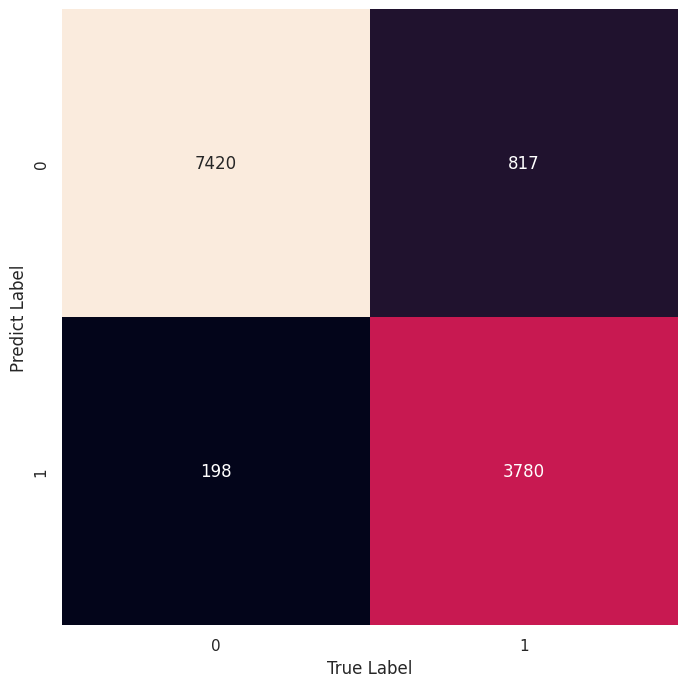

In [94]:
# mengvisualisasikan confuntion Matrix Logistic Regression

mat=confusion_matrix(y_test_smote,y_pred_lgbm_smote)
sns.heatmap(mat.T,square=True, annot=True, fmt='d',cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

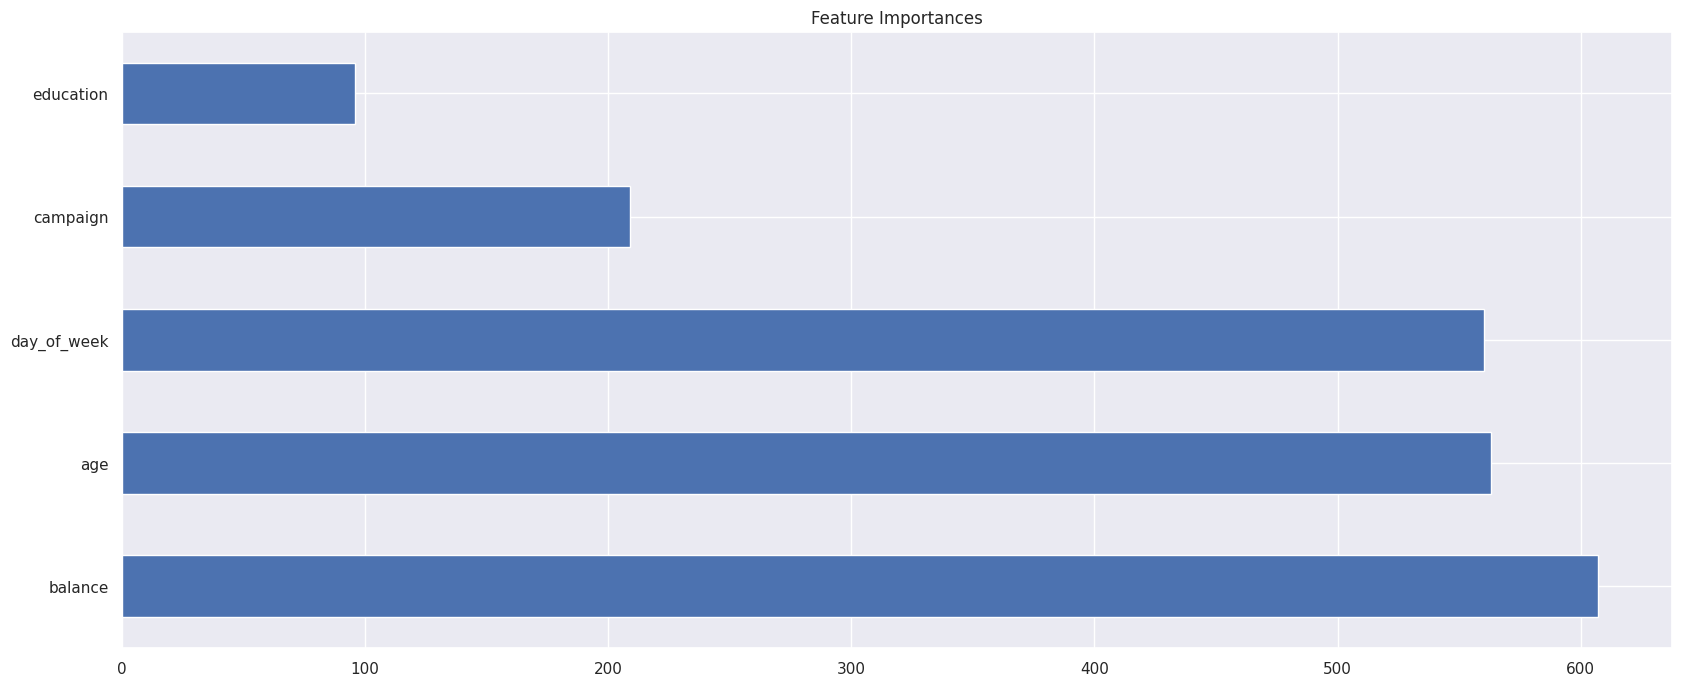

In [95]:
coef1 = pd.Series(model_lgbm.feature_importances_,index=x.columns).sort_values(ascending = False).head()
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

# Evaluasi Model LightGBM Model :
 Jadi hasil evaluasi untuk pemodelan klasifikasi Nasabah potensial untuk pembukaan rekening deposito melalui telemarketing menggunakan model LightGBM :
 1. Model Overfitting dalam mempredik nasabah yang tidak berpeluang membuka rekening deposito dengan nilai precision akurasi sebesar 90%, sedangkan overall accuracy sebesar 92%, jadi bisa disimpulkan bahwa model overfitting dalam mempredik nasabah yang tidak berpeluang membuka rekening deposito.
 2. Model Overfitting dalam mempredik nasabah yang berpeluang membuka rekening deposito dengan nilai precision akurasi 95% dan nilai accuracy 92%. Artinya precision lebih tinggi dari pada Accuracy.
 3. Secara confustion matrix, maka model pintar dalam mempredik orang yang tidak membuka dan membuka rekening deposito. Model Light GBM bisa digunakan dalam case ini.




In [96]:
decisions_sorted = sorted(model_lgbm.predict_proba(x_test_smote)[:,1],reverse=True)

In [97]:
df_decision = pd.DataFrame(model_lgbm.predict_proba(x_test_smote)[:,1],columns=['Probs'])

In [98]:
df_decision.sort_values(by=['Probs'],ascending = False)

,Probs
6083,0.859140
12005,0.848355
2570,0.843031
8577,0.835963
10336,0.820709
...,...
1134,0.009781
5187,0.009130
11590,0.009055
4568,0.008076
